In [1]:
import pandas as pd  # For displaying the data after
import matplotlib.pyplot as plt  # for plotting data
from src.twitter_util import TwitterApiGetter
from src.persistance_util import export_container_to_csv

In [2]:
twg = TwitterApiGetter()
minister_bios = twg.get_all_minister_twitter_bios(
    custom_user_fields=[
        "created_at",
        "description",
        "id",
        "location",
        "name",
        "public_metrics",
        "url",
        "username",
        "verified",
    ],
)
export_container_to_csv(container=minister_bios, path="data/minister_bios.csv")

INFO: 13/13 Twitter accounts of ministers with Twitter handles fetched.


In [3]:
minister_df = pd.read_csv("data/minister_bios.csv")
minister_df.head()

,created_at,id,verified,username,url,description,location,name,followers_count,following_count,tweet_count,listed_count,party
0,2009-02-11T14:34:58.000Z,20593301,True,Wissing,https://t.co/QyGCyDDccr,"Bundesminister für Digitales und Verkehr, Vors...","Schillerstraße 11a, 55116 Mainz",Volker Wissing,31157,998,13160,619,fdp
1,2010-03-11T16:11:51.000Z,122104353,True,c_lindner,https://t.co/mJgVJTabCr,Bundesminister der Finanzen. Bundesvorsitzende...,"Berlin, Deutschland",Christian Lindner,549618,1371,17671,2409,fdp
2,2015-05-21T14:01:21.000Z,3292982985,True,Karl_Lauterbach,https://t.co/aNTUPwOxBp,"SPD Bundestagsabgeordneter, Bundesgesundheitsm...","Berlin, Deutschland",Prof. Karl Lauterbach,828462,296,9570,2818,spd
3,2021-12-10T11:15:44.000Z,1469264387512979461,True,ABaerbock,https://t.co/bR6R0XD5I5,Offizieller Twitter Account von Außenministeri...,Berlin,Außenministerin Annalena Baerbock,91441,39,7,252,gruene
4,2012-06-27T16:33:18.000Z,620221740,True,NancyFaeser,https://t.co/Zu3jph3Ylw,Bundesministerin des Innern und für Heimat | V...,Hessen,Nancy Faeser,54186,386,1083,339,spd


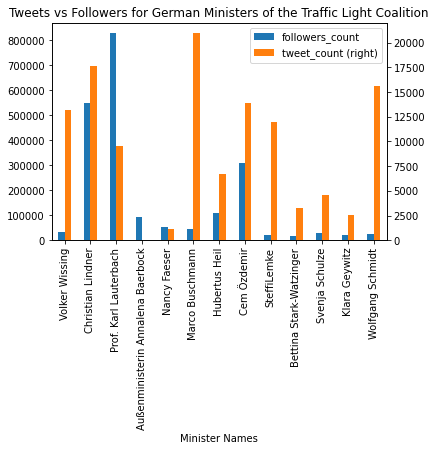

In [4]:
# Some visualization
tweet_ratio_plt = minister_df.plot(
    kind="bar",
    x="name",
    y=["followers_count", "tweet_count"],
    secondary_y="tweet_count",
)
tweet_ratio_plt.set_title(
    "Tweets vs Followers for German Ministers of the Traffic Light Coalition"
)
tweet_ratio_plt.set_xlabel("Minister Names")
plt.show()

In [5]:
party_stats_df = (
    minister_df.groupby(by=["party"])["followers_count", "tweet_count"]
    .mean()
    .sort_values(by=["followers_count", "tweet_count"], ascending=[False, True])
)
party_stats_df

/var/folders/n6/gc1kg4891tzd041w9shtbb_c0000gn/T/ipykernel_67991/2881319713.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  minister_df.groupby(by=["party"])["followers_count", "tweet_count"]


,followers_count,tweet_count
party,,
spd,177715.166667,6679.166667
fdp,160253.000000,13765.000000
gruene,140975.666667,8623.333333


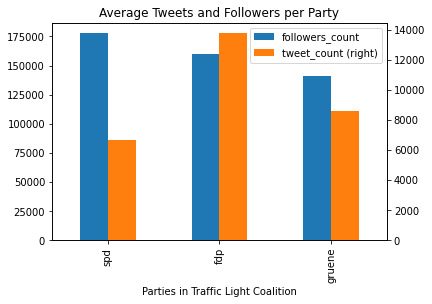

In [6]:
party_stats_plt = party_stats_df.plot(
    kind="bar", y=["followers_count", "tweet_count"], secondary_y="tweet_count"
)
party_stats_plt.set_title("Average Tweets and Followers per Party")
party_stats_plt.set_xlabel("Parties in Traffic Light Coalition")
plt.show()